Se auto to notebook prospathisa na problepso tin troxia tou X Coordinate!!!!
- USED MAPE. Did not work as expected.


In [1]:
import tensorflow as tf
import numpy as np
from pathlib import Path
import sys
sys.path.insert(0, "C:\\Users\\geork\\projects\\AIThesis\\src\\src")

from  dataset_reader import DatasetFromFiles

# Preprocessing on dataset

In [2]:
path = Path("C:\\Users\\geork\\projects\\AIThesis\\datasets\\20240510\\mlres")
out_path = Path("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\crash_xyz_coordinate_timeseries.csv")
# Check if out_path already exists
if out_path.exists():
    print(f"The file or directory {out_path} already exists.")
    # Handle the case where the file already exists, if needed
else:
    # Proceed with your operations
    r = DatasetFromFiles(path)
    r.setTimeSeriesLabel("Head_X_Coordinate")
    r.setTimeSeriesLabel("Head_Y_Coordinate")
    r.setTimeSeriesLabel("Head_Z_Coordinate")
    r.setOutputPath(out_path, True)
    r.read()

The file or directory C:\Users\geork\projects\AIThesis\src\analysis\ThesisChapters\5_4\crash_xyz_coordinate_timeseries.csv already exists.


In [3]:
from dataset_reader import DatasetReaderCSV
path = Path("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\crash_xyz_coordinate_timeseries.csv")
reader = DatasetReaderCSV(path)
reader.read()
df = reader.convert_to_dataframe()
df

,Id,Path,CarProfile,Velocity,Translation,Rotation,Position,HIC15_max,HIC36_max,Head_Z_Acceleration_abs_max,Head_X_Acceleration_abs_max,Head_Y_Acceleration_abs_max,BrIC_abs_max,Chest_Resultant_Acceleration_max,Chest_Resultant_Acceleration_CLIP3ms_max,Head_X_Coordinate,Head_Y_Coordinate,Head_Z_Coordinate
0,0,C:\Users\geork\projects\AIThesis\datasets\2024...,FCR,100,-200,0,initial,86.843,136.373,36.081,7.578,17.539,0.920,34.882,28.117,"[220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220...","[-288.045, -288.045, -288.045, -288.045, -288....","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1,1,C:\Users\geork\projects\AIThesis\datasets\2024...,FCR,100,-200,120,initial,2361.697,2866.369,103.348,179.802,54.333,1.718,36.302,19.450,"[334.04, 334.04, 334.04, 334.04, 334.04, 334.0...","[-90.522, -90.522, -90.522, -90.522, -90.522, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
2,2,C:\Users\geork\projects\AIThesis\datasets\2024...,FCR,100,-200,150,initial,573.455,573.455,74.161,77.655,72.795,0.936,24.091,19.183,"[285.841, 285.841, 285.841, 285.841, 285.841, ...","[-42.323, -42.323, -42.323, -42.323, -42.323, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
3,3,C:\Users\geork\projects\AIThesis\datasets\2024...,FCR,100,-200,180,initial,84.702,153.528,35.330,13.216,13.956,0.905,49.501,28.255,"[220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220...","[-24.681, -24.681, -24.681, -24.681, -24.681, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
4,4,C:\Users\geork\projects\AIThesis\datasets\2024...,FCR,100,-200,210,initial,592.965,592.965,42.322,138.277,19.926,0.965,25.420,18.131,"[154.159, 154.159, 154.159, 154.159, 154.159, ...","[-42.323, -42.323, -42.323, -42.323, -42.323, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1181,C:\Users\geork\projects\AIThesis\datasets\2024...,SUV,80,400,300,initial,623.367,805.513,60.709,102.335,33.421,1.185,57.473,54.938,"[113.96, 113.96, 113.96, 113.96, 113.96, 113.9...","[377.796, 377.796, 377.796, 377.796, 377.796, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1182,1182,C:\Users\geork\projects\AIThesis\datasets\2024...,SUV,80,400,30,initial,140.360,140.360,56.352,21.859,48.887,1.206,55.691,40.446,"[293.841, 293.841, 293.841, 293.841, 293.841, ...","[329.597, 329.597, 329.597, 329.597, 329.597, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1183,1183,C:\Users\geork\projects\AIThesis\datasets\2024...,SUV,80,400,330,initial,367.018,367.018,40.335,106.179,14.131,1.146,38.706,35.552,"[162.159, 162.159, 162.159, 162.159, 162.159, ...","[329.597, 329.597, 329.597, 329.597, 329.597, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1184,1184,C:\Users\geork\projects\AIThesis\datasets\2024...,SUV,80,400,60,initial,1317.014,1744.307,106.903,122.473,96.965,1.594,52.806,42.759,"[342.04, 342.04, 342.04, 342.04, 342.04, 342.0...","[377.796, 377.796, 377.796, 377.796, 377.796, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."


In [4]:
import ast

def str_to_list(s):
    return ast.literal_eval(s)

df["Head_X_Coordinate"] = df["Head_X_Coordinate"].apply(str_to_list)
df["Head_Y_Coordinate"] = df["Head_Y_Coordinate"].apply(str_to_list)
df["Head_Z_Coordinate"] = df["Head_Z_Coordinate"].apply(str_to_list)

In [5]:
df = df.drop(columns=["Path", "Id", "HIC15_max", "HIC36_max",
                      "Head_X_Acceleration_abs_max",
                      "Head_Y_Acceleration_abs_max",
                      "Head_Z_Acceleration_abs_max",
                      "BrIC_abs_max",
                      "Chest_Resultant_Acceleration_max",
                      "Chest_Resultant_Acceleration_CLIP3ms_max",
                      "Position"],
                    errors="ignore")
df = df.reset_index(drop=True)
df

,CarProfile,Velocity,Translation,Rotation,Head_X_Coordinate,Head_Y_Coordinate,Head_Z_Coordinate
0,FCR,100,-200,0,"[220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220...","[-288.045, -288.045, -288.045, -288.045, -288....","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1,FCR,100,-200,120,"[334.04, 334.04, 334.04, 334.04, 334.04, 334.0...","[-90.522, -90.522, -90.522, -90.522, -90.522, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
2,FCR,100,-200,150,"[285.841, 285.841, 285.841, 285.841, 285.841, ...","[-42.323, -42.323, -42.323, -42.323, -42.323, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
3,FCR,100,-200,180,"[220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220...","[-24.681, -24.681, -24.681, -24.681, -24.681, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
4,FCR,100,-200,210,"[154.159, 154.159, 154.159, 154.159, 154.159, ...","[-42.323, -42.323, -42.323, -42.323, -42.323, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
...,...,...,...,...,...,...,...
1181,SUV,80,400,300,"[113.96, 113.96, 113.96, 113.96, 113.96, 113.9...","[377.796, 377.796, 377.796, 377.796, 377.796, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1182,SUV,80,400,30,"[293.841, 293.841, 293.841, 293.841, 293.841, ...","[329.597, 329.597, 329.597, 329.597, 329.597, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1183,SUV,80,400,330,"[162.159, 162.159, 162.159, 162.159, 162.159, ...","[329.597, 329.597, 329.597, 329.597, 329.597, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1184,SUV,80,400,60,"[342.04, 342.04, 342.04, 342.04, 342.04, 342.0...","[377.796, 377.796, 377.796, 377.796, 377.796, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."


In [6]:
from car_profile_expand import expand_car_profiles
try:
    df = df.apply(expand_car_profiles, axis=1)
except:
    pass

df = df.drop(columns="CarProfile", errors="ignore")
new_order = ["Velocity", 
             "Translation", 
             "Rotation", 
             "Bumber_Height",
             "Front_Hood_Height", 
             "Bumber_Hood_Angle",
             "Hood_Length", 
             "Back_Hood_Height",  
             "Head_X_Coordinate", 
             "Head_Y_Coordinate", 
             "Head_Z_Coordinate"]
df = df[new_order]
#df = df.sample(frac=1).reset_index(drop=True)
df

,Velocity,Translation,Rotation,Bumber_Height,Front_Hood_Height,Bumber_Hood_Angle,Hood_Length,Back_Hood_Height,Head_X_Coordinate,Head_Y_Coordinate,Head_Z_Coordinate
0,100,-200,0,770,740,16,1150,980,"[220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220...","[-288.045, -288.045, -288.045, -288.045, -288....","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1,100,-200,120,770,740,16,1150,980,"[334.04, 334.04, 334.04, 334.04, 334.04, 334.0...","[-90.522, -90.522, -90.522, -90.522, -90.522, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
2,100,-200,150,770,740,16,1150,980,"[285.841, 285.841, 285.841, 285.841, 285.841, ...","[-42.323, -42.323, -42.323, -42.323, -42.323, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
3,100,-200,180,770,740,16,1150,980,"[220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220...","[-24.681, -24.681, -24.681, -24.681, -24.681, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
4,100,-200,210,770,740,16,1150,980,"[154.159, 154.159, 154.159, 154.159, 154.159, ...","[-42.323, -42.323, -42.323, -42.323, -42.323, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
...,...,...,...,...,...,...,...,...,...,...,...
1181,80,400,300,580,900,11,1160,1130,"[113.96, 113.96, 113.96, 113.96, 113.96, 113.9...","[377.796, 377.796, 377.796, 377.796, 377.796, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1182,80,400,30,580,900,11,1160,1130,"[293.841, 293.841, 293.841, 293.841, 293.841, ...","[329.597, 329.597, 329.597, 329.597, 329.597, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1183,80,400,330,580,900,11,1160,1130,"[162.159, 162.159, 162.159, 162.159, 162.159, ...","[329.597, 329.597, 329.597, 329.597, 329.597, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1184,80,400,60,580,900,11,1160,1130,"[342.04, 342.04, 342.04, 342.04, 342.04, 342.0...","[377.796, 377.796, 377.796, 377.796, 377.796, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."


In [7]:

def normalize_to_minus_one_to_one(values):
    min_val = min(values)
    max_val = max(values)
    
    # Handle the edge case where all values are the same
    if min_val == max_val:
        return [0 for _ in values]
    
    # Normalization to [0, 1]
    scaled_values = [(value - min_val) / (max_val - min_val) for value in values]
    
    # Mapping to [-1, 1]
    mapped_values = [round(2 * value - 1, 5) for value in scaled_values]
    
    return mapped_values

def calculate_trajectory_relative_change(trajectory):
    relative_change = []
    for i in range(1, len(trajectory)):
        delta = trajectory[i] - trajectory[i - 1]
        relative_change.append(round(delta, 5))
    return relative_change


##### RELATIVE CHANGE!@!!
def calculate_relative_change(row):
    row["Head_X_Coordinate"] = calculate_trajectory_relative_change(row["Head_X_Coordinate"])
    row["Head_X_Coordinate"] = normalize_to_minus_one_to_one(row["Head_X_Coordinate"])

    row["Head_Y_Coordinate"] = calculate_trajectory_relative_change(row["Head_Y_Coordinate"])
    row["Head_Y_Coordinate"] = normalize_to_minus_one_to_one(row["Head_Y_Coordinate"])

    row["Head_Z_Coordinate"] = calculate_trajectory_relative_change(row["Head_Z_Coordinate"])
    row["Head_Z_Coordinate"] = normalize_to_minus_one_to_one(row["Head_Z_Coordinate"])

    return row
    

In [8]:
from car_profile_expand import expand_car_profiles
try:
    df = df.apply(expand_car_profiles, axis=1)
except:
    pass

df

,Velocity,Translation,Rotation,Bumber_Height,Front_Hood_Height,Bumber_Hood_Angle,Hood_Length,Back_Hood_Height,Head_X_Coordinate,Head_Y_Coordinate,Head_Z_Coordinate
0,100,-200,0,770,740,16,1150,980,"[220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220...","[-288.045, -288.045, -288.045, -288.045, -288....","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1,100,-200,120,770,740,16,1150,980,"[334.04, 334.04, 334.04, 334.04, 334.04, 334.0...","[-90.522, -90.522, -90.522, -90.522, -90.522, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
2,100,-200,150,770,740,16,1150,980,"[285.841, 285.841, 285.841, 285.841, 285.841, ...","[-42.323, -42.323, -42.323, -42.323, -42.323, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
3,100,-200,180,770,740,16,1150,980,"[220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220...","[-24.681, -24.681, -24.681, -24.681, -24.681, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
4,100,-200,210,770,740,16,1150,980,"[154.159, 154.159, 154.159, 154.159, 154.159, ...","[-42.323, -42.323, -42.323, -42.323, -42.323, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
...,...,...,...,...,...,...,...,...,...,...,...
1181,80,400,300,580,900,11,1160,1130,"[113.96, 113.96, 113.96, 113.96, 113.96, 113.9...","[377.796, 377.796, 377.796, 377.796, 377.796, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1182,80,400,30,580,900,11,1160,1130,"[293.841, 293.841, 293.841, 293.841, 293.841, ...","[329.597, 329.597, 329.597, 329.597, 329.597, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1183,80,400,330,580,900,11,1160,1130,"[162.159, 162.159, 162.159, 162.159, 162.159, ...","[329.597, 329.597, 329.597, 329.597, 329.597, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1184,80,400,60,580,900,11,1160,1130,"[342.04, 342.04, 342.04, 342.04, 342.04, 342.0...","[377.796, 377.796, 377.796, 377.796, 377.796, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."


In [9]:
df = df.apply(calculate_relative_change, axis=1)

In [10]:
df

,Velocity,Translation,Rotation,Bumber_Height,Front_Hood_Height,Bumber_Hood_Angle,Hood_Length,Back_Hood_Height,Head_X_Coordinate,Head_Y_Coordinate,Head_Z_Coordinate
0,100,-200,0,770,740,16,1150,980,"[-0.81439, -0.81439, -0.81439, -0.81439, -0.81...","[-0.13686, -0.13686, -0.13686, -0.13686, -0.13...","[0.7931, 0.79049, 0.7931, 0.79075, 0.78788, 0...."
1,100,-200,120,770,740,16,1150,980,"[-0.36815, -0.36815, -0.36815, -0.36815, -0.36...","[0.97764, 0.97764, 0.97764, 0.97764, 0.97764, ...","[0.80407, 0.80289, 0.80407, 0.80301, 0.8017, 0..."
2,100,-200,150,770,740,16,1150,980,"[-0.70066, -0.70066, -0.70066, -0.70066, -0.70...","[0.96859, 0.96859, 0.96859, 0.96859, 0.96859, ...","[0.79766, 0.79573, 0.79766, 0.79592, 0.7938, 0..."
3,100,-200,180,770,740,16,1150,980,"[-0.80447, -0.80447, -0.80447, -0.80447, -0.80...","[0.15051, 0.15051, 0.15051, 0.15051, 0.15051, ...","[0.83689, 0.83412, 0.83689, 0.83439, 0.83135, ..."
4,100,-200,210,770,740,16,1150,980,"[-0.73389, -0.73389, -0.73389, -0.73389, -0.73...","[-0.17017, -0.17017, -0.17017, -0.17017, -0.17...","[0.86008, 0.85817, 0.86008, 0.85837, 0.85627, ..."
...,...,...,...,...,...,...,...,...,...,...,...
1181,80,400,300,580,900,11,1160,1130,"[-0.84062, -0.84062, -0.84062, -0.84062, -0.84...","[-0.32965, -0.32965, -0.32965, -0.32965, -0.32...","[0.79464, 0.79316, 0.79464, 0.79331, 0.79168, ..."
1182,80,400,30,580,900,11,1160,1130,"[-0.86507, -0.86507, -0.86507, -0.86507, -0.86...","[-0.98875, -0.98875, -0.98875, -0.98875, -0.98...","[0.58186, 0.57949, 0.58186, 0.57973, 0.57713, ..."
1183,80,400,330,580,900,11,1160,1130,"[-0.76039, -0.76039, -0.76039, -0.76039, -0.76...","[0.23726, 0.23726, 0.23726, 0.23726, 0.23726, ...","[0.85618, 0.85414, 0.85618, 0.85434, 0.85209, ..."
1184,80,400,60,580,900,11,1160,1130,"[-0.52933, -0.52933, -0.52933, -0.52933, -0.52...","[-0.97187, -0.97187, -0.97187, -0.97187, -0.97...","[0.75842, 0.75713, 0.75842, 0.75726, 0.75584, ..."


In [11]:
from tqdm import tqdm

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Checking rows", unit="row"):
    if (len(row["Head_X_Coordinate"]) != 300): print("Error!!")
    if (len(row["Head_Y_Coordinate"]) != 300): print("Error!!")
    if (len(row["Head_Z_Coordinate"]) != 300): print("Error!!")

Checking rows: 100%|██████████| 1186/1186 [00:00<00:00, 3916.51row/s]



Expanded DataFrame:
     Head_X_Coordinate  Head_Y_Coordinate  Head_Z_Coordinate
0             -0.81439           -0.13686            0.79310
1             -0.81439           -0.13686            0.79049
2             -0.81439           -0.13686            0.79310
3             -0.81439           -0.13686            0.79075
4             -0.81439           -0.13686            0.78788
..                 ...                ...                ...
296            0.98040           -0.77139            0.97048
297            0.98655           -0.76954            0.98041
298            0.99309           -0.76830            0.99060
299            1.00000           -0.76892            1.00000
300           -0.36815            0.97764            0.80407

[301 rows x 3 columns]


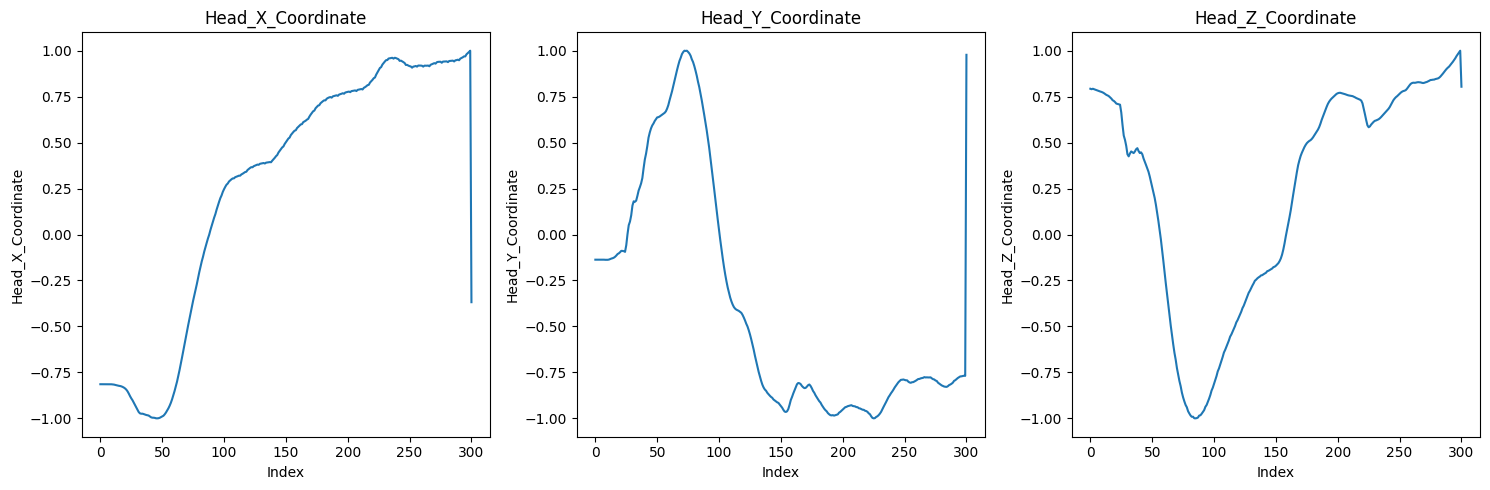

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import random 

def print_plot(df, labels, start, end):
    expanded_data = {label: [] for label in labels}
    
    for label in labels:
        for idx, sublist in enumerate(df[label]):
            for item in sublist:
                expanded_data[label].append(item)
    
    expanded_df = pd.DataFrame(expanded_data)
    print("\nExpanded DataFrame:")
    print(expanded_df[start:end])
    
    fig, axes = plt.subplots(1, len(labels), figsize=(15, 5))
    
    for i, label in enumerate(labels):
        expanded_df[label][start:end].plot(ax=axes[i], title=label)
        axes[i].set_ylabel(label)
        axes[i].set_xlabel('Index')
    
    plt.tight_layout()
    plt.show()

def print_plot_simulation(df, labels, sim_index):
    start = 301 * sim_index
    end   = 301 * sim_index + 301
    print_plot(df, labels, start, end)

def print_plot_random_simulation(df, labels):
    rand_int = random.randint(0, int(df.shape[0]))
    print_plot_simulation(df, labels, rand_int)
    
labels = ["Head_X_Coordinate", "Head_Y_Coordinate", "Head_Z_Coordinate"]
#print_plot_random_simulation(df, labels)
print_plot_simulation(df, labels, 0)

In [13]:
# split the df in train, test val.
# I want to split it before converting the compact lists into another df,
# so that each simulation will remain unchanged.
import pandas as pd
from sklearn.model_selection import train_test_split

train_size = 0.6
val_size = 0.2
test_size = 0.2

train_df, temp_df = train_test_split(df, train_size=train_size, random_state=13)
val_df, test_df = train_test_split(temp_df, test_size=test_size/(test_size + val_size), random_state=14)

In [14]:
def split_dataframe(df, scalar_columns, input_first, output_next):
    # Extract scalar features
    X_scalar = df[scalar_columns].values

    # Extract sequence features (first 75 values)
    X_seq = np.array(
        [
            df['Head_X_Coordinate'].apply(lambda x: x[:input_first]).values.tolist(),
            df['Head_Y_Coordinate'].apply(lambda x: x[:input_first]).values.tolist(),
            df['Head_Z_Coordinate'].apply(lambda x: x[:input_first]).values.tolist()
            ])

    # Transpose X_seq to have shape (num_samples, input_first, 3)
    X_seq = np.transpose(X_seq, (1, 2, 0))

    # Extract target sequences (next 'output_next' values)
    y_seq = np.array([
        df['Head_X_Coordinate'].apply(lambda x: x[input_first:input_first + output_next]).values.tolist(),
        #df['Head_Y_Coordinate'].apply(lambda x: x[input_first:input_first + output_next]).values.tolist(),
        #df['Head_Z_Coordinate'].apply(lambda x: x[input_first:input_first + output_next]).values.tolist()
                    ])

    # Transpose y_seq to have shape (num_samples, 10, 3)
    y_seq = np.transpose(y_seq, (1, 2, 0))

    # Concatenate scalar features with sequence features
    # Expanding X_scalar to have shape (num_samples, 1, num_features) to concatenate with X_seq
    X_scalar_expanded = np.expand_dims(X_scalar, axis=1)

    # Repeat scalar features to match the sequence length (input_first timesteps)
    X_scalar_repeated = np.repeat(X_scalar_expanded, input_first, axis=1)

    # Concatenate along the feature dimension
    X = np.concatenate([X_scalar_repeated, X_seq], axis=-1)

    # y_train is just the target sequences (y_seq)
    y = y_seq
    return X, y

In [15]:
scalar_columns = ['Velocity', 'Translation', 'Rotation', 'Bumber_Height', 
                'Front_Hood_Height', 'Bumber_Hood_Angle', 
                'Hood_Length', 'Back_Hood_Height']

first_steps = 75
next_steps = 75

X_train, y_train = split_dataframe(train_df, scalar_columns, first_steps, next_steps)
X_test, y_test = split_dataframe(test_df, scalar_columns, first_steps, next_steps)
X_val, y_val = split_dataframe(val_df, scalar_columns, first_steps, next_steps)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(711, 75, 11) (711, 75, 1)
(237, 75, 11) (237, 75, 1)
(238, 75, 11) (238, 75, 1)


In [16]:
train_df.columns

Index(['Velocity', 'Translation', 'Rotation', 'Bumber_Height',
       'Front_Hood_Height', 'Bumber_Hood_Angle', 'Hood_Length',
       'Back_Hood_Height', 'Head_X_Coordinate', 'Head_Y_Coordinate',
       'Head_Z_Coordinate'],
      dtype='object')

In [17]:
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((first_steps, 11)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))  # First LSTM layer
model.add(LSTM(64, return_sequences=True))  # Second LSTM layer
model.add(LSTM(128))  # Third LSTM layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(32, activation="relu", kernel_regularizer=l2(0.001)))  # Dense layer with L2 regularization
model.add(Dense(next_steps * 1, activation="tanh"))  # Output layer with tanh activation
model.add(Reshape((next_steps, 1)))  # Reshape to match the target output shape (10, 3)


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 75, 64)         │        11,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 75, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         2,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 75, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,707 (584.79 KB)

 Trainable params: 149,707 (584.79 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.metrics import RootMeanSquaredError

cp = ModelCheckpoint("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\5_X_rel_mape\\model12.keras", save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model.compile(loss=MeanAbsolutePercentageError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
          epochs=10000, 
          callbacks=[cp, 
                     es
                     ])

Epoch 1/10000
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - loss: 119.7137 - root_mean_squared_error: 0.6214 - val_loss: 2644.3225 - val_root_mean_squared_error: 0.6253
Epoch 2/10000
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 113.4225 - root_mean_squared_error: 0.6147 - val_loss: 227.5373 - val_root_mean_squared_error: 0.6231
Epoch 3/10000
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 115.4450 - root_mean_squared_error: 0.6100 - val_loss: 965.9647 - val_root_mean_squared_error: 0.6228
Epoch 4/10000
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 109.2021 - root_mean_squared_error: 0.6103 - val_loss: 1080.9402 - val_root_mean_squared_error: 0.6221
Epoch 5/10000
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 108.7917 - root_mean_squared_error: 0.6120 - val_loss: 105.8946 - val_root_mean_squared_error: 0.6220
Epoch 6/10000
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 110.5143 - root_mean_squared_error: 0.6092 - val_loss: 849.7182 - val_root_mean_squared_error: 0.6218
Epoch 7

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 102.2588 - root_mean_squared_error: 0.6263
Test Loss: [102.3316650390625, 0.6265839338302612]
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step


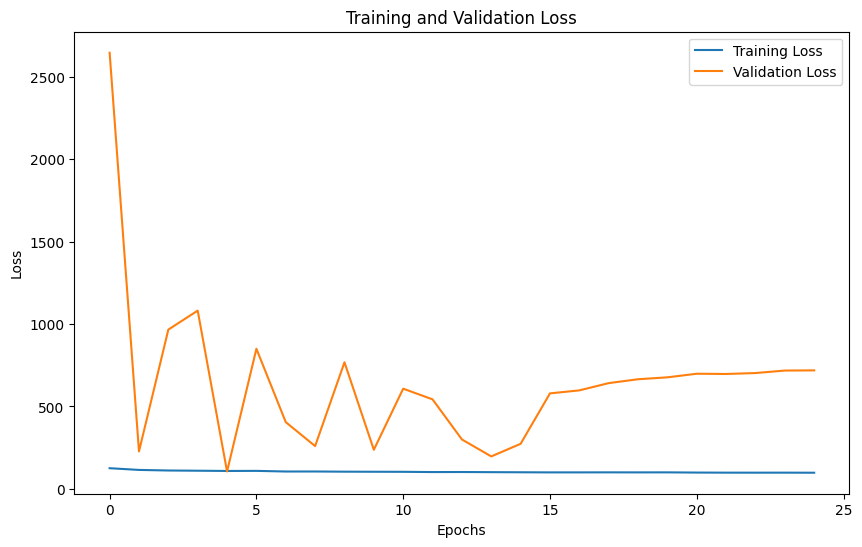

In [21]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
y_pred = model.predict(X_test)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\5_X_rel\\model12.keras")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions3(initial_seq, true_values, predicted_values, coordinate_name, row):
    # Extract the initial sequence from the DataFrame
    whole_timeseries = np.array(row[coordinate_name])
    
    # Concatenate the sequences
    initial_and_true = np.concatenate([initial_seq, true_values], axis=0)
    initial_and_pred = np.concatenate([initial_seq, predicted_values], axis=0)
    
    # Plot the true and predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(initial_and_true)), initial_and_true, label='True Values', marker='o')
    plt.plot(range(len(initial_and_pred)), initial_and_pred, label='Predicted Values', marker='x')
    plt.plot(range(len(whole_timeseries)), whole_timeseries, label="Timeseries")
    # Highlight where the prediction starts
    plt.axvline(x=len(initial_seq)-1, color='r', linestyle='--', label='Prediction Start')
    
    plt.title(f'True vs Predicted Values for {coordinate_name}')
    plt.xlabel('Timesteps')
    plt.ylabel(f'{coordinate_name} Value')
    plt.legend()
    plt.show()



In [ ]:
# Assuming model is trained and X_train, y_train are defined

# Make predictions
predictions = model.predict(X_test)

# Example for the first sample in the dataset
sample_index = 4
initial_seq = X_test[sample_index, :, -3:]  # Last 3 features are the coordinates
true_values = y_test[sample_index, :, :]  # True values
predicted_values = predictions[sample_index, :, :]  # Predicted values
# Plot for Head_X_Coordinate
plot_predictions3(initial_seq[:, 0], true_values[:, 0], predicted_values[:, 0], 'Head_X_Coordinate', test_df.iloc[sample_index])

# Plot for Head_Y_Coordinate
#plot_predictions3(initial_seq[:, 1], true_values[:, 1], predicted_values[:, 1], 'Head_Y_Coordinate', val_df.iloc[sample_index])

# Plot for Head_Z_Coordinate
#plot_predictions3(initial_seq[:, 2], true_values[:, 2], predicted_values[:, 2], 'Head_Z_Coordinate', val_df.iloc[sample_index])

## Conclusion

The Y is 0 because i have activation function relu.
This is why it is not working... i think.